In [13]:
import pandas as pd
df = pd.read_csv("data/vehicles/vehicles_messy.csv")
df

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37839,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37840,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
37841,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [14]:
df.trany.value_counts()

Automatic 4-spd                     11042
Manual 5-spd                         8311
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      681
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Automatic (A1)                        109
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                      

In [15]:
df[df.trany.str.startswith("A")] 

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [21]:
df.trany.isnull().value_counts()

False    37832
True        11
Name: trany, dtype: int64

In [25]:
# remove null trany values
df_clean = df[~df.trany.isnull()]

In [29]:
df_clean.loc[df_clean.trany.str.startswith("A"),"trany"] = "Auto"
df_clean.loc[df_clean.trany.str.startswith("M"),"trany"] = "Manual"

In [31]:
df_clean[["make","model","trany"]]

,make,model,trany
0,Alfa Romeo,Spider Veloce 2000,Manual
1,Ferrari,Testarossa,Manual
2,Dodge,Charger,Manual
3,Dodge,B150/B250 Wagon 2WD,Auto
4,Subaru,Legacy AWD Turbo,Manual
...,...,...,...
37838,Subaru,Legacy,Auto
37839,Subaru,Legacy,Manual
37840,Subaru,Legacy AWD,Auto
37841,Subaru,Legacy AWD,Manual


In [32]:
df_clean["trany"].value_counts()

Auto      25443
Manual    12389
Name: trany, dtype: int64

In [33]:
import numpy as np

In [34]:
marcas_caras = ["Audi","Mercedes","Ferrari"]

In [40]:
df_clean.make.isin(marcas_caras)

0        False
1         True
2        False
3        False
4        False
         ...  
37838    False
37839    False
37840    False
37841    False
37842    False
Name: make, Length: 37832, dtype: bool

In [41]:
df_clean["expensive"] = np.where(df_clean.make.isin(marcas_caras), "expensive", "not-expensive")


<ipython-input-41-fb0e8d6aa942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["expensive"] = np.where(df_clean.make.isin(marcas_caras), "expensive", "not-expensive")


In [42]:
df_clean[["make","model","expensive"]]

,make,model,expensive
0,Alfa Romeo,Spider Veloce 2000,not-expensive
1,Ferrari,Testarossa,expensive
2,Dodge,Charger,not-expensive
3,Dodge,B150/B250 Wagon 2WD,not-expensive
4,Subaru,Legacy AWD Turbo,not-expensive
...,...,...,...
37838,Subaru,Legacy,not-expensive
37839,Subaru,Legacy,not-expensive
37840,Subaru,Legacy AWD,not-expensive
37841,Subaru,Legacy AWD,not-expensive


In [47]:
df_clean[df_clean.expensive == "expensive"][["make","model","cylinders"]]

,make,model,cylinders
1,Ferrari,Testarossa,12.0
18,Audi,100,6.0
19,Audi,100,6.0
156,Audi,100 quattro Wagon,6.0
700,Ferrari,Ferrari 348 TB/TS/Spider,8.0
...,...,...,...
37715,Audi,S4,5.0
37716,Audi,100 quattro,6.0
37717,Audi,100 quattro,6.0
37718,Audi,90,6.0


In [50]:
df_clean[["make","model","year"]]

,make,model,year
0,Alfa Romeo,Spider Veloce 2000,1985
1,Ferrari,Testarossa,1985
2,Dodge,Charger,1985
3,Dodge,B150/B250 Wagon 2WD,1985
4,Subaru,Legacy AWD Turbo,1993
...,...,...,...
37838,Subaru,Legacy,1993
37839,Subaru,Legacy,1993
37840,Subaru,Legacy AWD,1993
37841,Subaru,Legacy AWD,1993


In [51]:
df_clean["year"].value_counts()

1984    1962
1985    1701
2015    1283
2016    1258
1987    1247
2014    1226
1986    1210
2008    1187
2013    1185
2009    1184
2005    1166
1989    1153
2012    1153
1991    1132
2011    1130
1988    1130
2007    1126
2004    1122
1992    1121
2010    1109
2006    1104
1993    1093
1990    1078
2003    1043
1994     982
2002     973
1995     967
2001     907
2017     863
1999     852
2000     838
1998     812
1996     773
1997     762
Name: year, dtype: int64

In [56]:
bins = [1979,1989,1999,2009,2019]
labels = list(range(1980,2020,10))
print("bin cuts",bins)
print("labels",labels)
df_clean["decada"] = pd.cut(df_clean.year,
                                bins=bins, 
                                labels=labels)

#(1979,1989]

bin cuts [1979, 1989, 1999, 2009, 2019]
labels [1980, 1990, 2000, 2010]


<ipython-input-56-cc5cb546c1a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["decada"] = pd.cut(df_clean.year,


In [59]:
df_clean[["make","model","year","decada"]]

,make,model,year,decada
0,Alfa Romeo,Spider Veloce 2000,1985,1980
1,Ferrari,Testarossa,1985,1980
2,Dodge,Charger,1985,1980
3,Dodge,B150/B250 Wagon 2WD,1985,1980
4,Subaru,Legacy AWD Turbo,1993,1990
...,...,...,...,...
37838,Subaru,Legacy,1993,1990
37839,Subaru,Legacy,1993,1990
37840,Subaru,Legacy AWD,1993,1990
37841,Subaru,Legacy AWD,1993,1990


In [62]:
df.describe()["year"]

count    37843.000000
mean      2000.064398
std         10.390588
min       1984.000000
25%       1990.000000
50%       2001.000000
75%       2009.000000
max       2017.000000
Name: year, dtype: float64

In [54]:
df_clean["decada"].value_counts()

2000    10650
1990     9572
2010     9207
1980     8403
Name: decada, dtype: int64

In [66]:
df_clean[
        (df_clean.decada == 2010) & (df_clean.make=="Subaru")
].trany.value_counts()




Auto      87
Manual    72
Name: trany, dtype: int64

In [67]:
df_clean.groupby("decada").agg({"cylinders":["mean","max","min"]})

cylinders           
            mean   max  min
decada                     
1980    5.419167  12.0  2.0
1990    5.653838  12.0  2.0
2000    5.991828  16.0  2.0
2010    5.823381  16.0  2.0

In [70]:
df_clean.groupby("decada").agg({
    "cylinders":["mean","max","min"]
})

cylinders           
            mean   max  min
decada                     
1980    5.419167  12.0  2.0
1990    5.653838  12.0  2.0
2000    5.991828  16.0  2.0
2010    5.823381  16.0  2.0

In [71]:
df_clean.groupby("make").agg({
    "cylinders":["mean","max","min"]
})

cylinders           
                                 mean   max  min
make                                            
AM General                   5.000000   6.0  4.0
ASC Incorporated             6.000000   6.0  6.0
Acura                        5.231788   6.0  4.0
Alfa Romeo                   5.288889   8.0  4.0
American Motors Corporation  5.407407   6.0  4.0
...                               ...   ...  ...
Volkswagen                   4.574124  12.0  4.0
Volvo                        4.920844   8.0  4.0
Wallace Environmental        7.812500  12.0  4.0
Yugo                         4.000000   4.0  4.0
smart                        3.000000   3.0  3.0

[133 rows x 3 columns]

In [76]:
analysis = df_clean.groupby(["make","decada"]).agg({
    "model":"count"
})

In [80]:
analysis

model
make             decada       
AM General       1980        6
                 1990        0
                 2000        0
                 2010        0
ASC Incorporated 1980        1
...                        ...
Yugo             2010        0
smart            1980        0
                 1990        0
                 2000        4
                 2010       26

[532 rows x 1 columns]

In [81]:
analysis.loc["Audi"]

,model
decada,
1980,99
1990,130
2000,355
2010,334


In [84]:
analysis.loc["Ferrari"]

,model
decada,
1980,17
1990,45
2000,62
2010,87


In [86]:
df_clean.groupby(["decada","make"]).agg({
    "model":"count"
}).loc[1980]

,model
make,
AM General,6
ASC Incorporated,1
Acura,18
Alfa Romeo,21
American Motors Corporation,27
...,...
Volkswagen,175
Volvo,130
Wallace Environmental,0


In [89]:
df_clean.groupby(["decada","make"]).agg({
    "model":"count"
}).loc[1980]

,model
make,
AM General,6
ASC Incorporated,1
Acura,18
Alfa Romeo,21
American Motors Corporation,27
...,...
Volkswagen,175
Volvo,130
Wallace Environmental,0


In [131]:
df_clean.groupby(["decada","make"]).agg({
    "model":"count"
}).loc[1980].reset_index()["make"]

0                       AM General
1                 ASC Incorporated
2                            Acura
3                       Alfa Romeo
4      American Motors Corporation
                  ...             
128                     Volkswagen
129                          Volvo
130          Wallace Environmental
131                           Yugo
132                          smart
Name: make, Length: 133, dtype: object

In [100]:
df_clean[df_clean.expensive =="expensive"][["make","model"]]

,make,model
1,Ferrari,Testarossa
18,Audi,100
19,Audi,100
156,Audi,100 quattro Wagon
700,Ferrari,Ferrari 348 TB/TS/Spider
...,...,...
37715,Audi,S4
37716,Audi,100 quattro
37717,Audi,100 quattro
37718,Audi,90


,Audi,Ferrari
decada,,
1980,99,17
1990,130,45
2000,355,62
2010,334,87


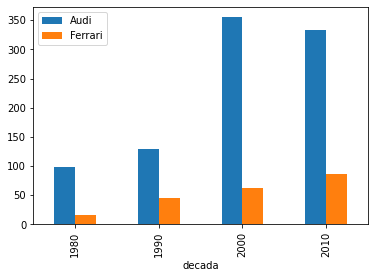

In [128]:
%matplotlib inline
m =  df_clean[df_clean.expensive =="expensive"]
audis = m[m.make=="Audi"].groupby("decada").agg({"model":"count"})
ferraris =  m[m.make=="Ferrari"].groupby("decada").agg({"model":"count"})


data = pd.concat([audis,ferraris], axis=1)
data.columns = ["Audi","Ferrari"]
display(data)
data.plot.bar()

,displ,cylinders
decada,,
1980,2.379310,5.491379
1990,3.042286,6.725714
2000,3.276739,6.613909
2010,3.431354,6.703088


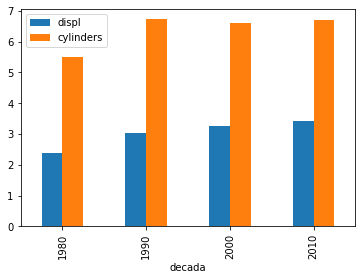

In [115]:

q = df_clean[df_clean.expensive == "expensive"].groupby("decada").agg({
        "displ":"mean", 
        "cylinders":"mean"
})
display(q)

q.plot.bar()

In [134]:
df_clean["displ"].describe()

count    37721.000000
mean         3.318093
std          1.361369
min          0.000000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: displ, dtype: float64

In [135]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply
# Apply in series -> processes per value
def transformer(value):
    return "big" if value >= 4 else "small"

df_clean["displacement_category"] = df_clean["displ"].apply(transformer)



<ipython-input-135-33e497d9f152>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["displacement_category"] = df_clean["displ"].apply(transformer)


In [136]:
df_clean[["displacement_category","displ"]]

,displacement_category,displ
0,small,2.0
1,big,4.9
2,small,2.2
3,big,5.2
4,small,2.2
...,...,...
37838,small,2.2
37839,small,2.2
37840,small,2.2
37841,small,2.2


In [137]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply
# Apply in dataframes -> processes per columns

def fn(columnSeries):
    return columnSeries*2

df_clean[["year","make"]].apply(fn)

,year,make
0,3970,Alfa RomeoAlfa Romeo
1,3970,FerrariFerrari
2,3970,DodgeDodge
3,3970,DodgeDodge
4,3986,SubaruSubaru
...,...,...
37838,3986,SubaruSubaru
37839,3986,SubaruSubaru
37840,3986,SubaruSubaru
37841,3986,SubaruSubaru


In [141]:
# Apply in dataframes (axis=1) -> processes per rows

def fn(rowSeries):
    prefix = "classic"
    if rowSeries.year > 2000:
        prefix = "new"    
    return f"{prefix}-{rowSeries.make}"

df_clean["newname"] = df_clean[["year","make"]].apply(fn, axis=1)

<ipython-input-141-615aced91077>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["newname"] = df_clean[["year","make"]].apply(fn, axis=1)


In [140]:
df_clean[["newname","make","year"]][df_clean.year==2010]

,newname,make,year
17961,new-Jaguar,Jaguar,2010
17962,new-Jaguar,Jaguar,2010
17963,new-Jaguar,Jaguar,2010
17965,new-Pontiac,Pontiac,2010
17966,new-Pontiac,Pontiac,2010
...,...,...,...
23417,new-Spyker,Spyker,2010
23418,new-Lotus,Lotus,2010
23419,new-Dodge,Dodge,2010
23421,new-BMW,BMW,2010
